# D-25

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
wine=pd.read_csv('wine_data.csv')
wine

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


### Normalization is a technique often applied as part of data preparation for machine learning.The goal of normalization is to change the values of numeric columns in the dataset to use a common scale,without distorting difference in the ranges of values  or losing information.

In [14]:
df=pd.read_csv('wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['Class label','Alcohol','Malic Acid']

In [16]:
df

,Class label,Alcohol,Malic Acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

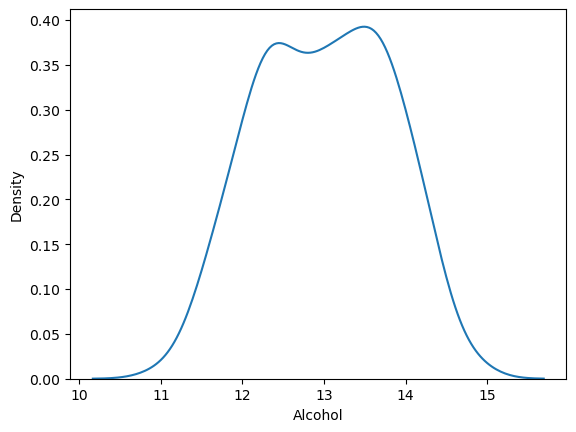

In [20]:
sns.kdeplot(x=df['Alcohol'])

<Axes: xlabel='Malic Acid', ylabel='Density'>

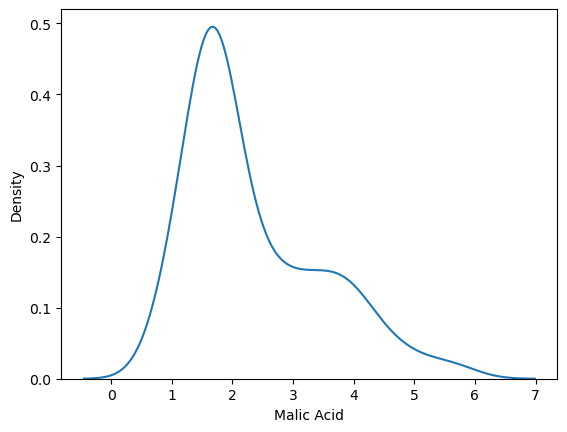

In [22]:
sns.kdeplot(x=df['Malic Acid'])

<Axes: xlabel='Alcohol', ylabel='Malic Acid'>

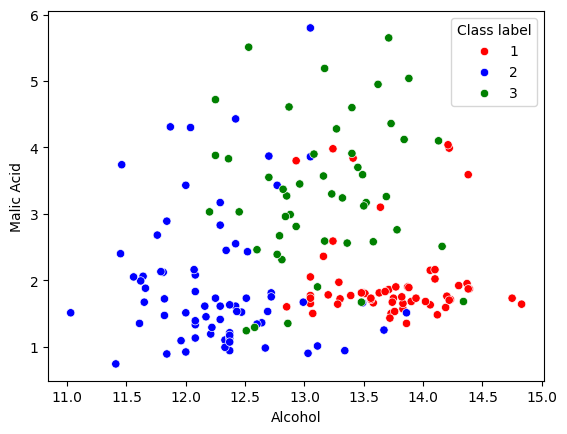

In [26]:
color_dict={1:'red',2:'blue',3:'green'}
sns.scatterplot(x=df['Alcohol'],y=df['Malic Acid'],hue=df['Class label'], palette=color_dict)

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop('Class label',axis=1),
                                               df['Class label'],
                                               test_size=0.3,
                                               random_state=0)
x_train.shape,x_test.shape

((124, 2), (54, 2))

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

#fit the scaler to the trin set,itwill learn the parameters
scaler.fit(x_train)

# transform train and test sets
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [32]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [34]:
np.round(x_train.describe(),1)


,Alcohol,Malic Acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [36]:
np.round(x_train_scaled.describe(),1)


,Alcohol,Malic Acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


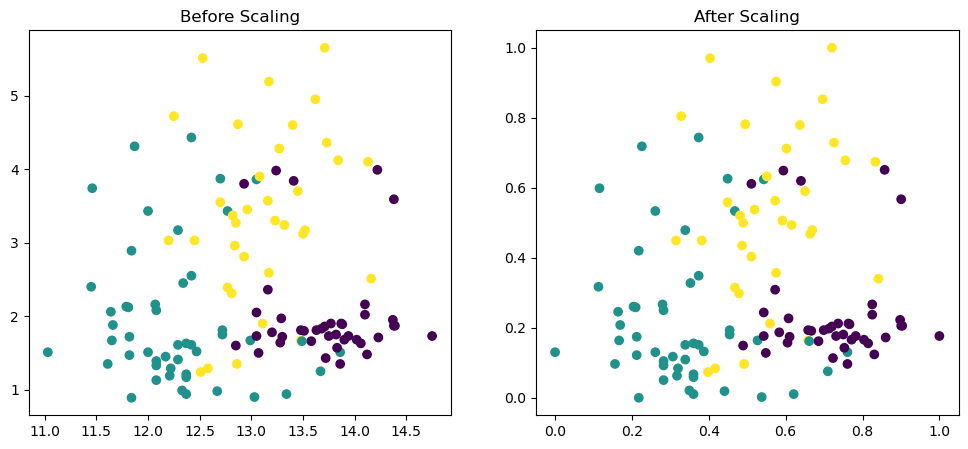

In [40]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(x_train['Alcohol'],x_train['Malic Acid'],c=y_train)
ax1.set_title("Before Scaling")

ax2.scatter(x_train_scaled['Alcohol'],x_train_scaled['Malic Acid'],c=y_train)
ax2.set_title("After Scaling")
              
plt.show()              

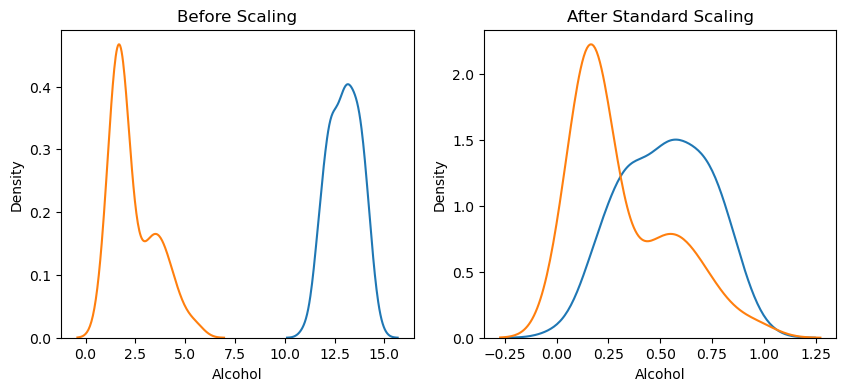

In [56]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Alcohol'], ax=ax1)
sns.kdeplot(x_train['Malic Acid'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(x_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(x_train_scaled['Malic Acid'], ax=ax2)
plt.show()
# konta alcohol r konta acid alada korbo kivabe?
# ekhane neel alcohol r holud acid

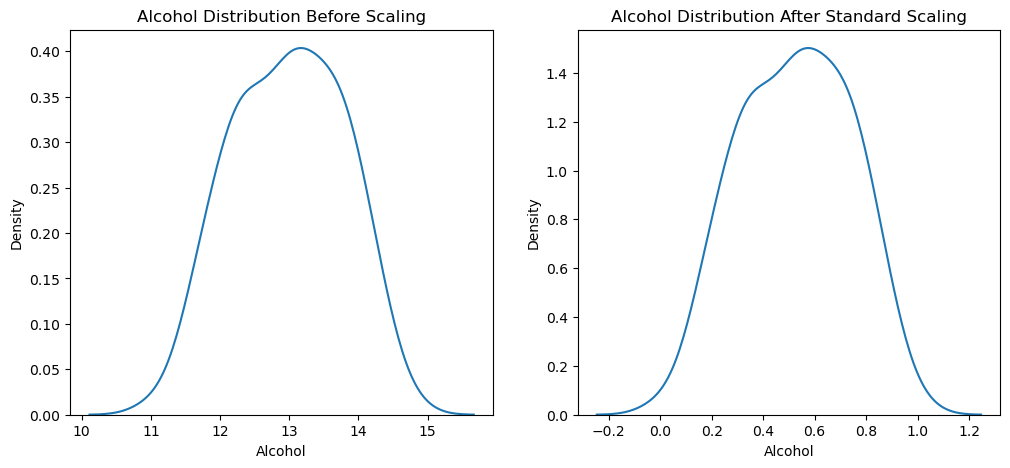

In [60]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(x_train['Alcohol'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After Standard Scaling')
sns.kdeplot(x_train_scaled['Alcohol'], ax=ax2)
plt.show()

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Malic Acid Distribution Before Scaling')
sns.kdeplot(x_train['Malic Acid'], ax=ax1)

# after scaling
ax2.set_title('Malic Acid Distribution After Standard Scaling')
sns.kdeplot(x_train_scaled['Malic Acid'], ax=ax2)
plt.show()